# Part 1: Classes and Methods

Exercise 1

In [ ]:
class Dog:
  def __init__(self, name, age, breed):
    self.name = name
    self.age = age
    self.breed = breed
  def __repr__(self):
    return f"{self.name},{self.age},{self.breed}"

In [ ]:
d1 = Dog('dingding', '1', 'Poodle')
d2 = Dog('dici', '2', 'Labrador')

In [ ]:
d1.name

'dingding'

In [ ]:
d2

dici,2,Labrador

Exercise 2

In [ ]:
class MyIntegers:
  def __init__(self, a):
    self.value = a
  def print(self):
    return self.value
  def add(self, N):
    return self.value + N
  def subtract(self, N):
    return self.value - N

In [ ]:
MyIntegers(3).print()

3

In [ ]:
MyIntegers(3).add(2)

5

In [ ]:
MyIntegers(3).subtract(2)

1

In [ ]:
class MyIntegers:
  def __init__(self, a):
    self.value = a
  def print(self):
    return self.value
  def add(self, N):
    self.value = self.value + N
  def subtract(self, N):
    return self.value - N

In [ ]:
x = MyIntegers(2)

In [ ]:
x.value

2

In [ ]:
x.add(3)

In [ ]:
x.value

5

# Part2: Reinforcement Learning Maze

In [1]:
import numpy as np
MazeMatrix = np.zeros((8, 6))
MazeMatrix[1, 1] = 1 
MazeMatrix[2, 1:5] = 1 
MazeMatrix[3, 1:3] = 1 
MazeMatrix[3, 4] = 1 
MazeMatrix[4, 1:2] = 1 
MazeMatrix[4, 3:5] = 1 
MazeMatrix[5, 1] = 1 
MazeMatrix[5, 3:5] = 1 
MazeMatrix[6, 3] = 1 
print(MazeMatrix)

[[0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 0.]
 [0. 1. 1. 0. 1. 0.]
 [0. 1. 0. 1. 1. 0.]
 [0. 1. 0. 1. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [2]:
nrows, ncols = MazeMatrix.shape
enumeration_matrix = np.arange(0, nrows*ncols).reshape(MazeMatrix.shape)
print(enumeration_matrix)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]
 [30 31 32 33 34 35]
 [36 37 38 39 40 41]
 [42 43 44 45 46 47]]


In [3]:
np.unravel_index(7, [nrows,ncols])

(1, 1)

In [4]:
np.multiply(MazeMatrix, enumeration_matrix)

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  7.,  0.,  0.,  0.,  0.],
       [ 0., 13., 14., 15., 16.,  0.],
       [ 0., 19., 20.,  0., 22.,  0.],
       [ 0., 25.,  0., 27., 28.,  0.],
       [ 0., 31.,  0., 33., 34.,  0.],
       [ 0.,  0.,  0., 39.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [5]:
reachable_ix = np.ravel(np.multiply(MazeMatrix, enumeration_matrix)) 
reachable_ix = list(reachable_ix[reachable_ix.nonzero()]) 
print(reachable_ix)

[7.0, 13.0, 14.0, 15.0, 16.0, 19.0, 20.0, 22.0, 25.0, 27.0, 28.0, 31.0, 33.0, 34.0, 39.0]


In [6]:
reachable_ix.index(enumeration_matrix[(1,1)])

0

In [7]:
states_dict = {}
for i in range(len(reachable_ix)):
  states_dict[i] = int(reachable_ix[i])
print(states_dict)

{0: 7, 1: 13, 2: 14, 3: 15, 4: 16, 5: 19, 6: 20, 7: 22, 8: 25, 9: 27, 10: 28, 11: 31, 12: 33, 13: 34, 14: 39}


In [8]:
action_str = ['up','down','left','right']
print(action_str)

['up', 'down', 'left', 'right']


In [9]:
action_coords = [[-1,0], [1,0], [0,-1], [0,1]] 
print(action_coords)

[[-1, 0], [1, 0], [0, -1], [0, 1]]


In [10]:
states_dict[0]

7

In [11]:
coords = np.array(np.unravel_index(states_dict[0],[nrows,ncols])) 
print(coords)

[1 1]


In [12]:
action_coords[0] + (coords)

array([0, 1])

In [13]:
l = [tuple(action_coords[i]+coords) for i in range(4)] 
print(l)

[(0, 1), (2, 1), (1, 0), (1, 2)]


In [14]:
def get_allowed_actions(state):
  state_num = states_dict[state] # get the enumeration for the matrix
  coords = np.array(np.unravel_index(state_num,[nrows,ncols])) # get [row, col] for state
  l = [tuple(action_coords[i]+coords) for i in range(4)] # list of all (row, col) combinations we can get to in one actions = []
  actions = []
  states = []
  for i, t in enumerate(l):
    if MazeMatrix[t]:
      actions.append(i) 
      states.append(reachable_ix.index(enumeration_matrix[t]))
  return actions, states

# testing if this work
actions, states = get_allowed_actions(5)

print(actions)
print(states)

[0, 1, 3]
[1, 8, 6]


In [15]:
print(states)

[1, 8, 6]


In [16]:
[action_str[act] for act in actions]

['up', 'down', 'right']

In [17]:
action_str = ['up','down','left','right'] # global variable for convenience

class Enviro(object):
  _action_coords = [[-1,0], [1,0], [0,-1], [0,1]] # class variable, available to all
  def __init__(self, MazeMatrix, start_coordinate, finish_coordinate):
    self.maze = MazeMatrix
    # create an internal variable _enumeration: a matrix with numeric position
    self._enumeration = np.arange(0, MazeMatrix.shape[0]*MazeMatrix.shape[1]).reshape(self.maze.shape) 
    self._reachable_ix() # creates a list of all accessible states given as numbers 
    self._states_dict()
    # create a state and finish property
    self.state = self.reachable_ix.index(self._enumeration[start_coordinate]) # start state 
    self.finish = self.reachable_ix.index(self._enumeration[finish_coordinate]) # goal state 
    self.nstates = len(self.states_dict)
    self.nactions = len(self._action_coords)

  def _reachable_ix(self):
    reach_array = np.ravel(np.multiply(self.maze, self._enumeration)) 
    # save the list of all accessible states as numbers as reachable_ix 
    self.reachable_ix = list(reach_array[reach_array.nonzero()])

  def _states_dict(self):
    states_dict = {}
    for i in range(len(self.reachable_ix)):
      states_dict[i] = int(self.reachable_ix[i]) # making sure the indices are integers not floats 
    self.states_dict = states_dict

  def get_allowed_actions(self, state):
    state_num = self.states_dict[state] # get the enumeration for the matrix
    nrows, ncols = self.maze.shape
    coords = np.array(np.unravel_index(state_num,[nrows,ncols])) # get [row, col] for state # l is a list of all (row, col) combinations we can get to in one move
    l = [tuple(Enviro._action_coords[i]+coords) for i in range(4)]
    actions, states = [], []
    for i, t in enumerate(l):
      if MazeMatrix[t]:
        actions.append(i) 
        states.append(self.reachable_ix.index(self._enumeration[t]))
    return actions, states

In [18]:
env = Enviro(MazeMatrix, (1,1), (6,3))

In [19]:
env.maze

array([[0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 0.],
       [0., 1., 1., 0., 1., 0.],
       [0., 1., 0., 1., 1., 0.],
       [0., 1., 0., 1., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [20]:
env.state, env.finish

(0, 14)

In [21]:
env.reachable_ix

[7.0,
 13.0,
 14.0,
 15.0,
 16.0,
 19.0,
 20.0,
 22.0,
 25.0,
 27.0,
 28.0,
 31.0,
 33.0,
 34.0,
 39.0]

In [22]:
env.states_dict

{0: 7,
 1: 13,
 2: 14,
 3: 15,
 4: 16,
 5: 19,
 6: 20,
 7: 22,
 8: 25,
 9: 27,
 10: 28,
 11: 31,
 12: 33,
 13: 34,
 14: 39}

In [23]:
for i in list(env.states_dict.keys()): 
  acts, sts = env.get_allowed_actions(i) 
  print("state :", i)
  for act, st in zip(acts, sts):
        print("allowed action:", act, "=",action_str[act], "lead to new state", st)

state : 0
allowed action: 1 = down lead to new state 1
state : 1
allowed action: 0 = up lead to new state 0
allowed action: 1 = down lead to new state 5
allowed action: 3 = right lead to new state 2
state : 2
allowed action: 1 = down lead to new state 6
allowed action: 2 = left lead to new state 1
allowed action: 3 = right lead to new state 3
state : 3
allowed action: 2 = left lead to new state 2
allowed action: 3 = right lead to new state 4
state : 4
allowed action: 1 = down lead to new state 7
allowed action: 2 = left lead to new state 3
state : 5
allowed action: 0 = up lead to new state 1
allowed action: 1 = down lead to new state 8
allowed action: 3 = right lead to new state 6
state : 6
allowed action: 0 = up lead to new state 2
allowed action: 2 = left lead to new state 5
state : 7
allowed action: 0 = up lead to new state 4
allowed action: 1 = down lead to new state 10
state : 8
allowed action: 0 = up lead to new state 5
allowed action: 1 = down lead to new state 11
state : 9
allo

In [24]:
action_str = ['up','down','left','right'] 
# global variable for convenience

class Enviro(object):

  _action_coords = [[-1,0], [1,0], [0,-1], [0,1]] # class variable, available to all

  def __init__(self, MazeMatrix, start_coordinate, finish_coordinate):
    self.maze = MazeMatrix
    # create an internal variable _enumeration: a matrix with numeric position
    self._enumeration = np.arange(0, MazeMatrix.shape[0]*MazeMatrix.shape[1]).reshape(self.maze.shape) 
    self._reachable_ix() # creates a list of all accessible states given as numbers 
    self._states_dict()
    # create a state and finish property
    self.state = self.reachable_ix.index(self._enumeration[start_coordinate]) # start state 
    self.finish = self.reachable_ix.index(self._enumeration[finish_coordinate]) # goal state 
    self.nstates = len(self.states_dict)
    self.nactions = len(self._action_coords)
  def _reachable_ix(self):
    reach_array = np.ravel(np.multiply(self.maze, self._enumeration)) 
    # save the list of all accessible states as numbers as reachable_ix 
    self.reachable_ix = list(reach_array[reach_array.nonzero()])

  def _states_dict(self):
    states_dict = {}
    for i in range(len(self.reachable_ix)):
      states_dict[i] = int(self.reachable_ix[i]) # making sure the indices are integers not floats 
    self.states_dict = states_dict

  def get_allowed_actions(self, state):
    state_num = self.states_dict[state] # get the enumeration for the matrix
    nrows, ncols = self.maze.shape
    coords = np.array(np.unravel_index(state_num,[nrows,ncols])) # get [row, col] for state 
    # l is a list of all (row, col) combinations we can get to in one move
    l = [tuple(Enviro._action_coords[i]+coords) for i in range(4)]
    actions, states = [], []
    for i, t in enumerate(l):
      if MazeMatrix[t]:
          actions.append(i) 
          states.append(self.reachable_ix.index(self._enumeration[t]))
    return actions, states

  def step(self, state):
    # read the new state that the robot will take in the maze and give reward or stop game 
    # then update the environemnt with the new state
    new_state = state # store the new state in new_state
    if (new_state == self.finish): # if completed the maze
        reward = 10
        done = True 
    else: # otherwise
        reward = -1
        done = False 
    self.state = new_state 
    return reward, done

In [26]:
env = Enviro(MazeMatrix, (1,1), (6,3))
epochs = 0
history = [] #
done = False # so far we are not done

In [28]:
env.state

0

In [29]:
import random

env = Enviro(MazeMatrix, (1,1), (6,3)) # create an instance of the class epochs = 0
history = [] #
done = False # so far we are not done

while not done:
  old_state = env.state # Read current state from the Envo instance
  # uste the get_allowed_actions function from Enviro class to get all allowed action-state pairs 
  # get all allowed action-state paires from the Environment in the current state
  acts, states = env.get_allowed_actions(old_state)
  ix = random.randrange(len(acts)) # choose a random index from acts
  action = acts[ix] # the randomly choosen action
  state = states[ix] # and it corresponding state
  reward, done = env.step(state) # get reward, and info if we are done or not,
                                      # and update the robot's position (state) in the environment
  history.append({
        'epoch' : epochs,
        'state' : old_state,
        'action_name' : action_str[action],
        'new_state' : state,
        'reward' : reward
        })
  epochs += 1

In [30]:
epochs

63

In [32]:
history[0]

{'epoch': 0, 'state': 0, 'action_name': 'down', 'new_state': 1, 'reward': -1}

In [33]:
history[-1]

{'epoch': 62,
 'state': 12,
 'action_name': 'down',
 'new_state': 14,
 'reward': 10}

In [34]:
class Agent(object): 
  def __init__(self): 
    self.epochs = 0
    self.history = [] 
    self.total_rewards = 0

  def choose_action_state_pair(self, actions, states): 
    ix = random.randrange(len(actions))
    action, state = actions[ix], states[ix]
    return action, state

  def update_history(self, old_state, act, new_state, reward): 
    self.total_rewards += reward
    new_epoch = ({
                'epoch' : self.epochs,
                'state' : old_state,
                'action' : act,
                'new_state' : state,
                'reward' : reward,
                'sum_rewards' :self.total_rewards
                })
    self.epochs += 1 
    self.history.append(new_epoch)

In [35]:
env = Enviro(MazeMatrix, (1,1), (6,3)) # create a new instance of the class 
robot = Agent() # create a new instance of the robot

In [36]:
old_state = env.state 
old_state

0

In [37]:
acts, sts = env.get_allowed_actions(old_state) 
acts, sts

([1], [1])

In [38]:
act, new_state = robot.choose_action_state_pair(acts, sts) 
act, new_state

(1, 1)

In [39]:
env = Enviro(MazeMatrix, (1,1), (6,3)) # create a new instance of the class 
robot = Agent() # create a new instance of the robot
done = False 
while not done:
  old_state = env.state # get the state from the Envo instance of the class
  acts, sts = env.get_allowed_actions(old_state)
  act, new_state = robot.choose_action_state_pair(acts, sts)
  reward, done = env.step(new_state) # get reward, and update the robots position in the maze env. 
  robot.update_history(old_state,act,state,reward)

In [40]:
robot.history[:2]

[{'epoch': 0,
  'state': 0,
  'action': 1,
  'new_state': 14,
  'reward': -1,
  'sum_rewards': -1},
 {'epoch': 1,
  'state': 1,
  'action': 1,
  'new_state': 14,
  'reward': -1,
  'sum_rewards': -2}]

In [42]:
robot.history[-2:]

[{'epoch': 37,
  'state': 13,
  'action': 2,
  'new_state': 14,
  'reward': -1,
  'sum_rewards': -38},
 {'epoch': 38,
  'state': 12,
  'action': 1,
  'new_state': 14,
  'reward': 10,
  'sum_rewards': -28}]

In [43]:
env = Enviro(MazeMatrix, (1,1), (6,3))
robot = Agent() # create a new instance of the robot 
maze_start = env.state # normal start

n_episodes = 100

total_epochs_per_episode = [0] * n_episodes
total_reward_per_episode = [0] * n_episodes

for i in range(n_episodes): 
  epochs = 0
  done = False
  env.state = maze_start # reset env so robot is at normal start state 
  robot.total_rewards = 0 # reset the rewards for the robot
  while not done:
    old_state = env.state # get the state from the Envo instance of the class 
    acts, sts = env.get_allowed_actions(old_state)
    act, new_state = robot.choose_action_state_pair(acts, sts)
    _, done = env.step(new_state)
    robot.update_history(old_state,act,state,reward)
    epochs += 1

    total_reward_per_episode[i] = robot.total_rewards 
    total_epochs_per_episode[i] = epochs

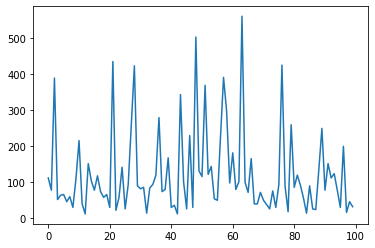

In [44]:
from matplotlib import pyplot as plt
plt.plot(total_epochs_per_episode)

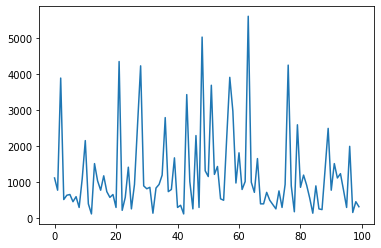

In [45]:
plt.plot(total_reward_per_episode)

In [46]:
sum(total_epochs_per_episode)/len(total_epochs_per_episode)

120.9

In [48]:
# -np.ones([env.nstates,env.nactions]) + \
initial_q_table = 0.1*np.random.rand(env.nstates,env.nactions) 
initial_q_table[env.finish,] = 0  # no further rewards expected

In [49]:
initial_q_table

array([[0.08174227, 0.04948859, 0.02095046, 0.03991606],
       [0.04180966, 0.06007078, 0.01802055, 0.09795899],
       [0.08344288, 0.08472744, 0.03647369, 0.02443795],
       [0.09713851, 0.02330797, 0.03089788, 0.04889979],
       [0.09589633, 0.01234417, 0.03744533, 0.02552837],
       [0.09795036, 0.04534532, 0.09315763, 0.08442295],
       [0.02407037, 0.06164745, 0.01558472, 0.05591225],
       [0.09056421, 0.06994575, 0.08723512, 0.06739696],
       [0.03889401, 0.09707372, 0.00716343, 0.09466872],
       [0.04335458, 0.09434083, 0.07459544, 0.07290902],
       [0.08583474, 0.09763367, 0.00297346, 0.03190232],
       [0.00405119, 0.06226027, 0.05509131, 0.09103896],
       [0.03976488, 0.08255301, 0.07691674, 0.09799512],
       [0.06087082, 0.03254541, 0.0328664 , 0.05589187],
       [0.        , 0.        , 0.        , 0.        ]])

In [50]:
for row, col in enumerate(initial_q_table): 
  acts, _ = env.get_allowed_actions(row) 
  for j in range(len(col)):
    if j not in acts:
      initial_q_table[row,j] = float('nan')

initial_q_table

array([[       nan, 0.04948859,        nan,        nan],
       [0.04180966, 0.06007078,        nan, 0.09795899],
       [       nan, 0.08472744, 0.03647369, 0.02443795],
       [       nan,        nan, 0.03089788, 0.04889979],
       [       nan, 0.01234417, 0.03744533,        nan],
       [0.09795036, 0.04534532,        nan, 0.08442295],
       [0.02407037,        nan, 0.01558472,        nan],
       [0.09056421, 0.06994575,        nan,        nan],
       [0.03889401, 0.09707372,        nan,        nan],
       [       nan, 0.09434083,        nan, 0.07290902],
       [0.08583474, 0.09763367, 0.00297346,        nan],
       [0.00405119,        nan,        nan,        nan],
       [0.03976488, 0.08255301,        nan, 0.09799512],
       [0.06087082,        nan, 0.0328664 ,        nan],
       [0.        ,        nan,        nan,        nan]])

In [52]:
class Agent(object): 
  def __init__(self): 
    self.epochs = 0
    self.history = []
    self.total_rewards = 0
    self.alpha = 0.2 # learning rate
    self.gamma = 0.8 # discount = 1/(1 + discount rate)
    self.epsilon = 0.1 # explore with prob epsilon or exploit with prob 1-epsilon 
    self._create_q_table()

  def _create_q_table(self):
    from copy import copy
    self.q_table = copy(initial_q_table)

  def choose_action_state_pair(self, old_state, actions, states):
    if random.uniform(0,1) < self.epsilon: # with Prob epsilon, explore the enviroment
        ix = random.randrange(len(actions)) # by choosing a random action
    else: # with Prob 1-epsilon exploit stored knowledge
        ix = self.q_table[old_state, actions].argmax() # by choosing the action which maximize Q 
    action, state = actions[ix], states[ix]
    return action, state

  def update_q_table(self, old_state, act, next_state, reward):
    old_value = self.q_table[old_state, act] # Old Q value
    next_max = np.nanmax(self.q_table[next_state]) # Max future Q value based on future actions 
    new_value = (1 - self.alpha) * old_value + self.alpha * (reward + self.gamma * next_max) 
    self.q_table[old_state, act] = new_value

  def update_history(self, old_state, act, new_state, reward): 
    self.total_rewards += reward
    new_epoch = ({
                  'epoch' : self.epochs,
                  'state' : old_state,
                  'action' : act,
                  'new_state' : new_state,
                  'reward' : reward,
                  'sum_rewards' :self.total_rewards
                  })
    self.epochs += 1 
    self.history.append(new_epoch)

In [53]:
env = Enviro(MazeMatrix, (1,1), (6,3)) 
maze_start = env.state # normal start
robot = Agent()

In [54]:
n_episodes = 100 
total_epochs = 0
for i in range(n_episodes): 
  epochs = 0
  done = False
  env.state = maze_start # reset to start state

  while not done:
    old_state = env.state # get the state from the Envo instance of the class
    acts, sts = env.get_allowed_actions(old_state)
    act, new_state = robot.choose_action_state_pair(old_state, acts, sts)
    reward, done = env.step(new_state) # get reward, and update the robots position in the maze env. 
    robot.update_q_table(old_state,act,new_state,reward)
    epochs += 1

  total_epochs += epochs

In [55]:
print(robot.q_table)

[[        nan -2.48448434         nan         nan]
 [-3.23351112 -3.34827689         nan -1.8546742 ]
 [        nan -2.96342732 -3.01043997 -1.06793358]
 [        nan         nan -2.35279771 -0.08482338]
 [        nan  1.14399396 -1.38202178         nan]
 [-3.16177912 -3.1477511          nan -3.08958493]
 [-2.32217705         nan -3.03200155         nan]
 [-0.23096474  2.67999809         nan         nan]
 [-3.15682103 -3.15225964         nan         nan]
 [        nan  6.99999997         nan  1.85670246]
 [-0.49839199  0.12541862  4.59999974         nan]
 [-3.15683935         nan         nan         nan]
 [ 2.68738282 10.                 nan  1.10689459]
 [ 0.15178026         nan  5.3050045          nan]
 [ 0.                 nan         nan         nan]]


In [56]:
n_episodes = 1000 
total_epochs = 0

for i in range(n_episodes): 
  epochs = 0
  done = False

  env.state = maze_start # reset to start state

  while not done:
    old_state = env.state # get the state from the Envo instance of the class
    acts, sts = env.get_allowed_actions(old_state)
    act, new_state = robot.choose_action_state_pair(old_state, acts, sts)
    reward, done = env.step(new_state) # get reward, and update the robots position in the maze env. 
    robot.update_q_table(old_state,act,new_state,reward)
    epochs += 1
    
print(robot.q_table)

[[        nan -2.4834176          nan         nan]
 [-2.98733101 -2.9915905          nan -1.854272  ]
 [        nan -2.48346867 -2.48345347 -1.06784   ]
 [        nan         nan -1.85427231 -0.0848    ]
 [        nan  1.144      -1.06784876         nan]
 [-3.02610682 -3.1477511          nan -2.48396224]
 [-1.85427203         nan -3.0360601          nan]
 [-0.08480167  2.68               nan         nan]
 [-3.15682103 -3.15225964         nan         nan]
 [        nan  7.                 nan  2.67998825]
 [ 1.14365889  4.59953816  4.6                nan]
 [-3.15683935         nan         nan         nan]
 [ 4.59968221 10.                 nan  4.5974139 ]
 [ 1.85155296         nan  6.99999982         nan]
 [ 0.                 nan         nan         nan]]


In [58]:
robot.epsilon = 0 # no exploring, purely use Q values 
env.state = maze_start # reset to start state 
robot.history = [] # clear history
done = False
while not done:
  old_state = env.state # get the state from the Envo instance of the class
  acts, sts = env.get_allowed_actions(old_state)
  act, new_state = robot.choose_action_state_pair(old_state, acts, sts)
  reward, done = env.step(new_state) # get reward, and update the robots position in the maze env. 
  robot.update_history(old_state,act,new_state,reward)

In [59]:
robot.history

[{'epoch': 0,
  'state': 0,
  'action': 1,
  'new_state': 1,
  'reward': -1,
  'sum_rewards': -1},
 {'epoch': 1,
  'state': 1,
  'action': 3,
  'new_state': 2,
  'reward': -1,
  'sum_rewards': -2},
 {'epoch': 2,
  'state': 2,
  'action': 3,
  'new_state': 3,
  'reward': -1,
  'sum_rewards': -3},
 {'epoch': 3,
  'state': 3,
  'action': 3,
  'new_state': 4,
  'reward': -1,
  'sum_rewards': -4},
 {'epoch': 4,
  'state': 4,
  'action': 1,
  'new_state': 7,
  'reward': -1,
  'sum_rewards': -5},
 {'epoch': 5,
  'state': 7,
  'action': 1,
  'new_state': 10,
  'reward': -1,
  'sum_rewards': -6},
 {'epoch': 6,
  'state': 10,
  'action': 2,
  'new_state': 9,
  'reward': -1,
  'sum_rewards': -7},
 {'epoch': 7,
  'state': 9,
  'action': 1,
  'new_state': 12,
  'reward': -1,
  'sum_rewards': -8},
 {'epoch': 8,
  'state': 12,
  'action': 1,
  'new_state': 14,
  'reward': 10,
  'sum_rewards': 2}]

# Part 3 : Reinforcement Learning

In [60]:
 # Import the packages

import keras
from keras import layers, models, optimizers 
from keras import backend as K 
from collections import namedtuple, deque
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option 
import datetime
import math
from numpy.random import choice
import random
from collections import deque

<Axes: >

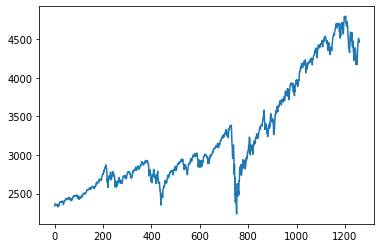

In [61]:
# Load the data
data = pd.read_csv("SP500.csv")

data.head(5)

data['Close'].plot()

In [62]:
# Checking for any null values and removing the null values'''
print('Null Values =',data.isnull().values.any())

Null Values = False


In [63]:
X=list(data["Close"])

X = X[-0:640]

validation_size = 0.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 61.8 MB/s eta 0:00:00


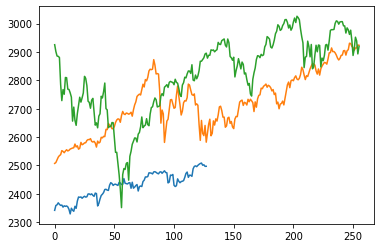

In [64]:
#In case the data is not dependent on the time series, then train and test split should be done based on sequential sample
#This can be done by selecting an arbitrary split point in the ordered list of observations and creating two new datasets.
train_size1 = int(len(X) * 0.2)
train_size2 = int(len(X) * 0.4)
test_size = len(X) - train_size1 - train_size2

X_train1 = X[:train_size1]
X_train2 = X[train_size1:train_size1+train_size2]
X_test = X[train_size1+train_size2:]

plt.plot(X_train1)
plt.plot(X_train2)
plt.plot(X_test)

!pip install yfinance
import yfinance as yf

# Download data on the ticker
ticker = yf.Ticker("AAPL")
data = ticker.history(period="1y")

# Set the time-frame on the training set
train_start_date = '2020-01-01'
train_end_date = '2020-06-30'
train_data = data.loc[train_start_date : train_end_date]

In [65]:
# Set the time-frame for the first training set
train_start_date_1 = '2020-01-01'
train_end_date_1 = '2020-06-30'
train_data_1 = data.loc[train_start_date_1 : train_end_date_1]

# Set the time-frame for the second training set
train_start_date_2 = '2020-07-01'
train_end_date_2 = '2020-12-31'
train_data_2 = data.loc[train_start_date_2 : train_end_date_2]

In [66]:
#from IPython.core.debugger import set_trace
import random
from collections import deque

In [67]:
class Agent:
    def __init__(self, state_size, is_eval=False, model_name="", learning_rate=0.01):
        # State size depends and is equal to the window size, and previous days
        self.state_size = state_size # normalize previous days
        self.action_size = 3 # sit, buy, sell
        self.memory = deque(maxlen=1000)
        self.inventory = []
        self.model_name = model_name
        self.is_eval = is_eval
        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = learning_rate

        self.model = load_model(model_name) if is_eval else self._model()
    # Deep Q learning model - returns the q-value when given state as input
    # Change of layers network to something that run quicly, 12 and 4
    def _model(self):
        model = Sequential()
        model.add(Dense(units=12, input_dim=self.state_size, activation="relu"))
        model.add(Dense(units=4, activation="relu"))
        model.add(Dense(units=4, activation="relu"))
        model.add(Dense(self.action_size, activation="linear"))
        model.compile(loss="mse", optimizer=Adam(learning_rate=self.learning_rate))
        return model
    
    def act(self, state): 
        if not self.is_eval and random.random() <= self.epsilon:
            return random.randrange(self.action_size)        
        options = self.model.predict(state)
        return np.argmax(options[0])
    
    def expReplay(self, batch_size):
        mini_batch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in mini_batch:
            target = reward 
            if not done:
                next_state = np.reshape(next_state, (1, self.state_size))
                Q_next = self.model.predict(next_state)[0]
                target = reward + self.gamma * np.amax(Q_next)
            state = np.reshape(state, (1, self.state_size))
            Q_current = self.model.predict(state)[0]
            Q_current[action] = Q_current[action] + self.learning_rate * (target - Q_current[action])
            self.model.fit(state, np.reshape(Q_current, (1, self.action_size)), verbose=0)
            
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def load(self, name):
        self.model.load_weights(name)

    def save(self, name):
        self.model.save_weights(name)


In [68]:
# prints formatted price
def formatPrice(n):
    return ("-$" if n < 0 else "$") + "{0:.2f}".format(abs(n))

# returns the sigmoid
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# returns an an n-day state representation ending at time t
def getState(data, t, n):    
    d = t - n + 1
    block = data[d:t + 1] if d >= 0 else -d * [data[0]] + data[0:t + 1] # pad with t0
    #block is which is the for [1283.27002, 1283.27002]
    res = []
    for i in range(n - 1):
        res.append(sigmoid(block[i + 1] - block[i]))
    return np.array([res])

In [69]:
# Plots the behavior of the output
def plot_behavior(data_input, states_buy, states_sell, profit):
    fig = plt.figure(figsize = (15,5))
    plt.plot(data_input, color='r', lw=2.)
    plt.plot(data_input, '^', markersize=10, color='m', label = 'Buying signal', markevery = states_buy)
    plt.plot(data_input, 'v', markersize=10, color='k', label = 'Selling signal', markevery = states_sell)
    plt.title('Total gains: %f'%(profit))
    plt.legend()
    #plt.savefig('output/'+name+'.png')
    plt.show()

In [70]:
window_size = 1
agent = Agent(window_size)
#In this step we feed the closing value of the stock price 
data = X_train1
data2 = X_train2
data3 = X_test
l = len(data) - 1
#
batch_size = 127
#
episode_count = 10

Running episode 0/10
time
0 /  127
time
1 /  127
time
2 /  127
time
3 /  127
time
4 /  127
time
5 /  127
time
6 /  127
time
7 /  127
time
8 /  127
time
9 /  127
time
10 /  127
time
11 /  127
time
12 /  127
time
13 /  127
time
14 /  127
time
15 /  127
time
16 /  127
time
17 /  127
time
18 /  127
time
19 /  127
time
20 /  127
time
21 /  127
time
22 /  127
time
23 /  127
time
24 /  127
time
25 /  127
time
26 /  127
time
27 /  127
time
28 /  127
time
29 /  127
time
30 /  127
time
31 /  127
time
32 /  127
time
33 /  127
time
34 /  127
time
35 /  127
time
36 /  127
time
37 /  127
time
38 /  127
time
39 /  127
time
40 /  127
time
41 /  127
time
42 /  127
time
43 /  127
time
44 /  127
time
45 /  127
time
46 /  127
time
47 /  127
time
48 /  127
time
49 /  127
time
50 /  127
time
51 /  127
time
52 /  127
time
53 /  127
time
54 /  127
time
55 /  127
time
56 /  127
time
57 /  127
time
58 /  127
time
59 /  127
time
60 /  127
time
61 /  127
time
62 /  127
time
63 /  127
time
64 /  127
time
65 /  127

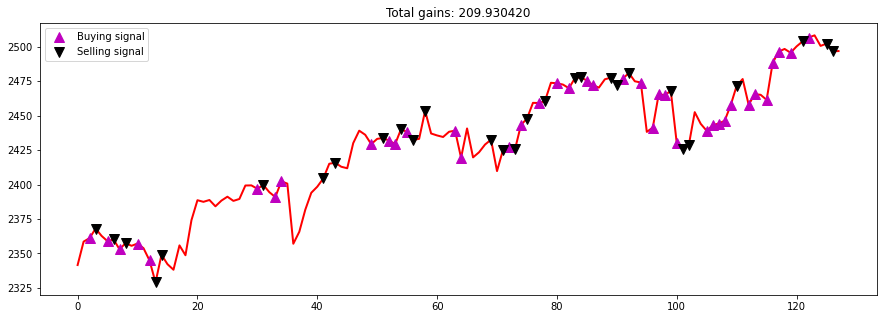

Running episode 1/10
time
0 /  127
1/1 [==============================] - 0s 19ms/step
time
1 /  127
1/1 [==============================] - 0s 46ms/step
time
2 /  127
1/1 [==============================] - 0s 28ms/step
time
3 /  127
1/1 [==============================] - 0s 20ms/step
time
4 /  127
1/1 [==============================] - 0s 25ms/step


KeyboardInterrupt: ignored

In [71]:
for e in range(episode_count + 1):
    print("Running episode " + str(e) + "/" + str(episode_count))
    state = getState(data, 0, window_size + 1)
    #set_trace()
    total_profit = 0
    agent.inventory = []
    states_sell = []
    states_buy = []
    for t in range(l):
        action = agent.act(state)    
        # sit
        print('time')
        print(t,"/ ", l)
        next_state = getState(data, t + 1, window_size + 1)
        reward = 0

        if action == 1: # buy
            agent.inventory.append(data[t])
            states_buy.append(t)
            #print("Buy: " + formatPrice(data[t]))

        elif action == 2 and len(agent.inventory) > 0: # sell
            bought_price = agent.inventory.pop(0)      
            reward = max(data[t] - bought_price, 0)
            total_profit += data[t] - bought_price
            states_sell.append(t)
            #print("Sell: " + formatPrice(data[t]) + " | Profit: " + formatPrice(data[t] - bought_price))

        done = True if t == l - 1 else False
        #appends the details of the state action etc in the memory, which is used further by the exeReply function
        agent.memory.append((state, action, reward, next_state, done))
        state = next_state

        if done:
            print("--------------------------------")
            print("Total Profit: " + formatPrice(total_profit))
            print("--------------------------------")
            #set_trace()
            #pd.DataFrame(np.array(agent.memory)).to_csv("Agent"+str(e)+".csv")
            #Chart to show how the model performs with the stock goin up and down for each 
            plot_behavior(data,states_buy, states_sell, total_profit)
        if len(agent.memory) > batch_size:
            agent.expReplay(batch_size)    
            

    if e % 2 == 0:
        agent.model.save("model_ep" + str(e))

In [72]:
# Deep Q-Learning Model
print(agent.model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                24        
                                                                 
 dense_1 (Dense)             (None, 4)                 52        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 3)                 15        
                                                                 
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________
None


Model file model_ep10 not found
Buy: $2901.61
Sell: $2885.57 | profit: -$16.04
Buy: $2884.43
Buy: $2785.68
Buy: $2767.13
Buy: $2750.79
Sell: $2809.92 | profit: -$74.51
Buy: $2656.10
Buy: $2705.57
Sell: $2658.69 | profit: -$126.99
Sell: $2711.74 | profit: -$55.39
Sell: $2723.06 | profit: -$27.73
Sell: $2738.31 | profit: $82.21
Buy: $2755.45
Buy: $2806.83
Sell: $2722.18 | profit: $16.61
Sell: $2730.20 | profit: -$25.25
Sell: $2690.73 | profit: -$116.10
Buy: $2641.89
Sell: $2673.45 | profit: $31.56
Buy: $2637.72
Sell: $2651.07 | profit: $13.35
Buy: $2485.74
Buy: $2506.85
Buy: $2447.89
Sell: $2531.94 | profit: $46.20
Buy: $2574.41
Buy: $2584.96
Buy: $2596.64
Sell: $2596.26 | profit: $89.41
Sell: $2582.61 | profit: $134.72
Sell: $2616.10 | profit: $41.69
Sell: $2635.96 | profit: $51.00
Sell: $2632.90 | profit: $36.26
Buy: $2638.70
Buy: $2664.76
1/1 [==============================] - 0s 37ms/step
Sell: $2643.85 | profit: $5.15
Buy: $2640.00
Sell: $2704.10 | profit: $39.34
Buy: $2706.53
Sell:

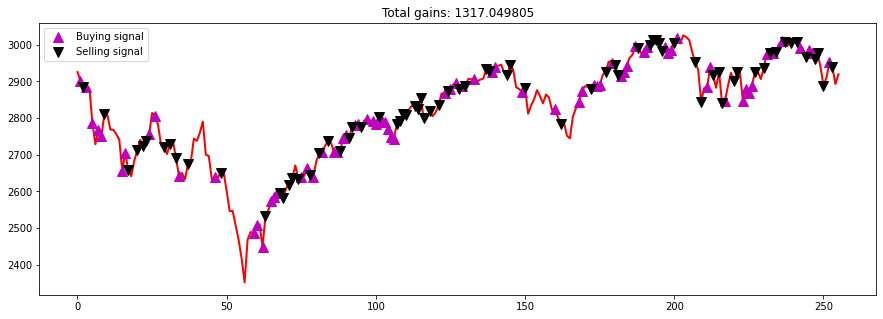

In [73]:
#Testing the Data

import os

#agent is already defined in the training set above.
test_data = X_test

l_test = len(test_data) - 1
state = getState(test_data, 0, window_size + 1)
total_profit = 0
is_eval = True
done = False
states_sell_test = []
states_buy_test = []
#Get the trained model
model_name = "model_ep"+str(episode_count)
#model_name = "model_ep"+str(0)

# Check if the model file exists before creating the agent object
if os.path.isfile(model_name):
    agent = Agent(window_size, is_eval, model_name)
else:
    print(f"Model file {model_name} not found")
    # Do something else or exit the program
    exit()

state = getState(data, 0, window_size + 1)
total_profit = 0
agent.inventory = []

for t in range(l_test):
    action = agent.act(state)
    next_state = getState(test_data, t + 1, window_size + 1)
    reward = 0

    if action == 1:
        agent.inventory.append(test_data[t])
        states_buy_test.append(t)
        print("Buy: " + formatPrice(test_data[t]))

    elif action == 2 and len(agent.inventory) > 0:
        bought_price = agent.inventory.pop(0)
        reward = max(test_data[t] - bought_price, 0)
        total_profit += test_data[t] - bought_price
        states_sell_test.append(t)
        print("Sell: " + formatPrice(test_data[t]) + " | profit: " + formatPrice(test_data[t] - bought_price))

    if t == l_test - 1:
        done = True
    agent.memory.append((state, action, reward, next_state, done))
    state = next_state

    if done:
        print("------------------------------------------")
        print("Total Profit: " + formatPrice(total_profit))
        print("------------------------------------------")
        
plot_behavior(test_data,states_buy_test, states_sell_test, total_profit)